# 👀 Multilayer perceptron (MLP)

In this notebook, we'll walk through the steps required to train your own multilayer perceptron on the CIFAR dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
# from notebooks.utils import display

## 0. Parameters <a name="parameters"></a>

In [ ]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

Loads the CIFAR-10 dataset. x_train and x_test are numpy arrays of shape
[50000, 32, 32, 3] and [10000, 32, 32, 3], respectively. y_train and
y_test are numpy arrays with shape [50000, 1] and [10000, 1], respectively,
containing the integer labels in the range 0 to 9 for the class of each image.

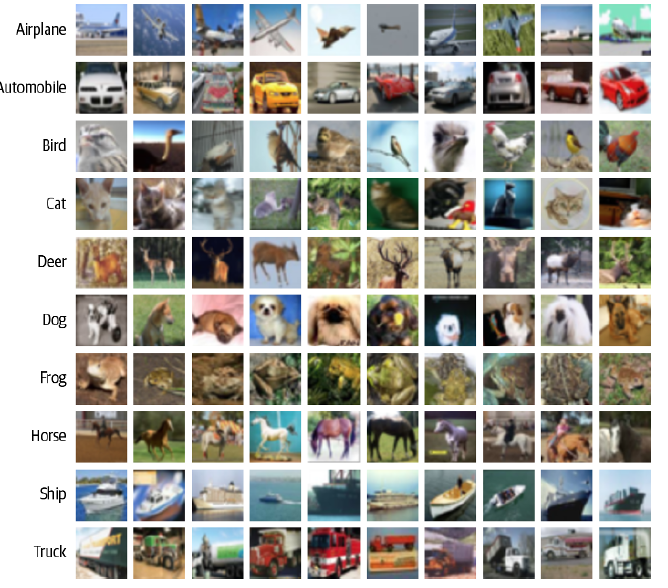

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


By default the image data consists of integers between 0 and 255 for each pixel
channel. Neural networks work best when each input is inside the range –1 to 1,
so we need to divide by 255.



In [ ]:
x_train = x_train.astype("float32") / 255.0           #normalisation
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)  # one-hot-encoded of output labels.
y_test = utils.to_categorical(y_test, NUM_CLASSES)    # one-hot-encoded of output labels.

In [ ]:
display(x_train[:10])
print(y_train[:10])

## 2. Build the model <a name="build"></a>

In [ ]:
input_layer = layers.Input((32, 32, 3))

x = layers.Flatten()(input_layer)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3. Train the model <a name="train"></a>

* The loss function is used by the neural network to compare its predicted output to
the ground truth. It returns a single number for each observation; the greater this
number, the worse the network has performed for this observation.

* then categorical cross-entropy is the correct loss function for multi-class classification

* The optimizer is the algorithm that will be used to update the weights in the neural
network based on the gradient of the loss function. One of the most commonly used
and stable optimizers is Adam.

In [ ]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

* The batch_size determines how many observations will be passed to the network
at each training step.
* The epochs determine how many times the network will be shown the full training
data
* If shuffle = True, the batches will be drawn randomly without replacement
from the training data at each training step.

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.8444 - accuracy: 0.3337
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6661 - accuracy: 0.4032
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5861 - accuracy: 0.4329
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5310 - accuracy: 0.4529
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4916 - accuracy: 0.4660
Epoch 6/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4555 - accuracy: 0.4805
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4239 - accuracy: 0.4949
Epoch 8/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4005 - accuracy: 0.5024
Epoch 9/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.3753 - accuracy: 0.5105
Epoch 10/10
1563/1563 [==============================] - 15s 10ms/ste

## 4. Evaluation <a name="evaluate"></a>

In [ ]:
# evaluate the model on unseen images
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4319 - accuracy: 0.4919


[1.4318913221359253, 0.4918999969959259]

In [ ]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test) # make prediction on test data
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 3ms/step


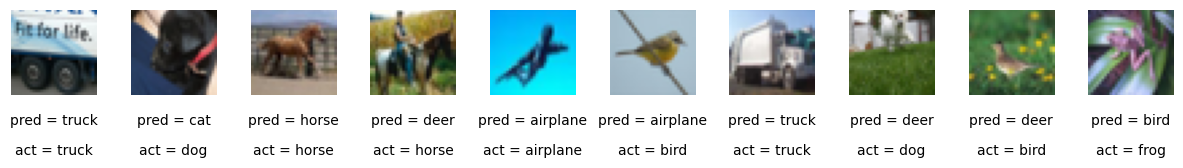

In [ ]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)